## Smoothing techniques
1. moving average
2. simple smoothing
3. holt mathod

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20,5

from statsmodels.tsa.api import ExponentialSmoothing , SimpleExpSmoothing , Holt

import warnings
warnings.filterwarnings('ignore')

In [10]:
electric_ts = pd.read_csv('Electric_Production.csv',header=0,index_col=0)

In [12]:
electric_ts['units'] = electric_ts.IPG2211A2N
electric_ts.drop(['IPG2211A2N'],axis=1,inplace=True)

In [16]:
electric_ts.head()

,units
DATE,
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151


## 1. Moving average method

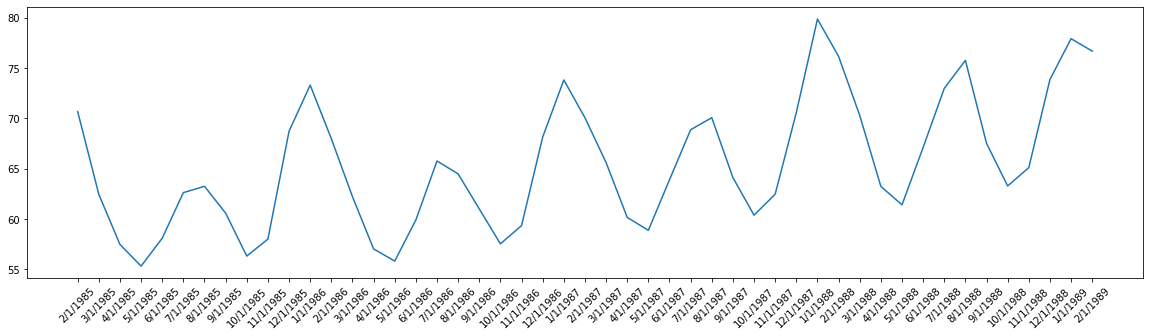

In [21]:
plt.plot(electric_ts[1:50]['units'])
plt.xticks(rotation=45)
plt.show()

### Note: 
1. Here above we can see the seasonality and also can see the upward trend in this data. In every year oct , nov ,dec , jan ,feb , march we can see the seasonality.

In [26]:
## rolling average transform
rolling_series = electric_ts[1:50].rolling(window=5)

rolling_mean =  rolling_series.mean() # finding rolling mean MA(5)

rolling_mean.head(10)

,units
DATE,
2/1/1985,NaN
3/1/1985,NaN
4/1/1985,NaN
5/1/1985,NaN
6/1/1985,60.79982
7/1/1985,59.18946
8/1/1985,59.34912
9/1/1985,59.97176
10/1/1985,60.17182


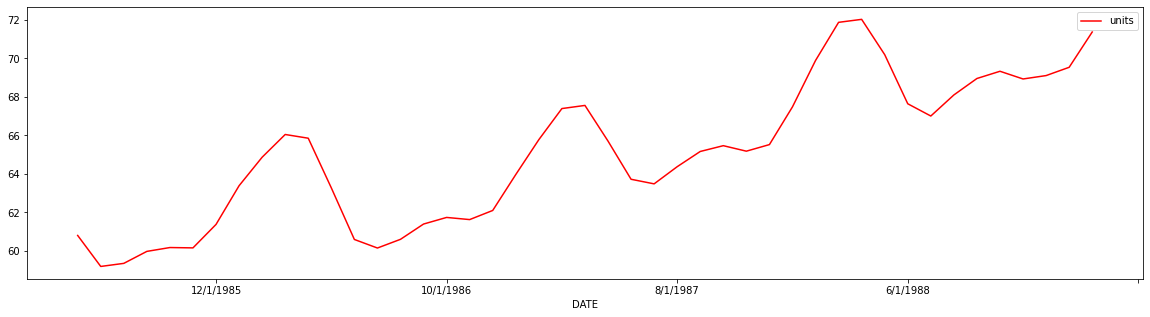

In [27]:
rolling_mean.plot(color='red')
plt.show()

### Note:
1. here we can see first chart has more zig-zag and after moving average the curve is smoothen. and increseing the windows more smoothen the curve

## 2. Simple exponential smoothing

In [29]:
# Exponential smoothing-single

data = electric_ts[1:50]

# here smoothing_level is weightage to most recent observation.
# we giving the low weightage to most recent observation here 0.2
# it means we giving the more weightage to old observations
fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)

# here smoothing_level is weightage to most recent observation.
# we giving the high weightage to most recent observation here 0.8
# it means we giving the more weightage to recent observations and low weightage to old observation
fit2 = SimpleExpSmoothing(data).fit(smoothing_level=0.8,optimized=False)

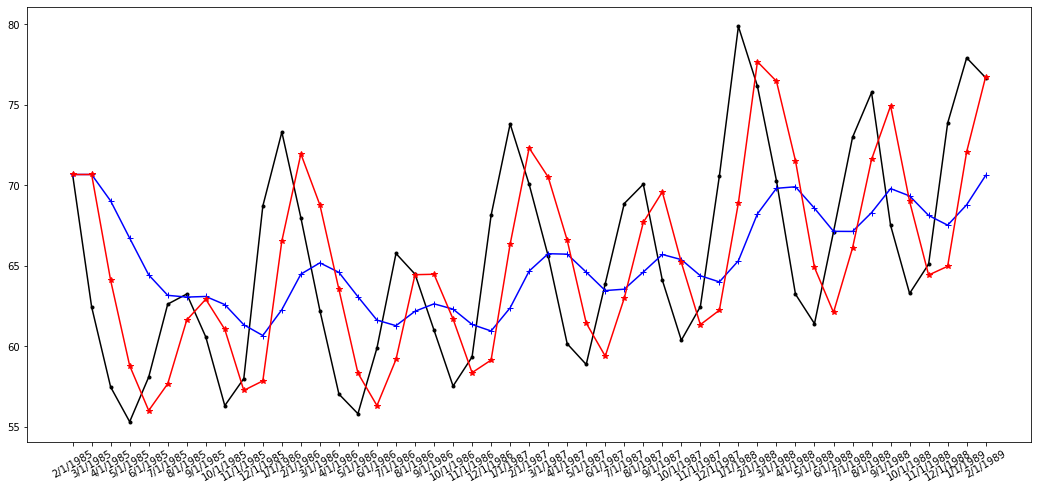

In [35]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=30)

# original data
plt.plot(electric_ts[1:50] , marker='.' , color='black')
# data when we give low weightage to recent obseravtion
plt.plot(fit1.fittedvalues , marker='+' , color='blue')
# data when we give high weightage to recent obseravtion
plt.plot(fit2.fittedvalues , marker='*' , color='red')


## Note:
1. here we can see if we give more weight to recent observstion then ouer curve follows the original curve like red curve
2. and if give less weight to recent observation or distribute the same weight to all observation then we can see the blu curve here

## 3. Holt method 

In [36]:
## here we are assuming our data has liner trend
fit1 = Holt(data).fit()

## here we are assuming our data has exponential trend
fit2 = Holt(data,exponential=True).fit()

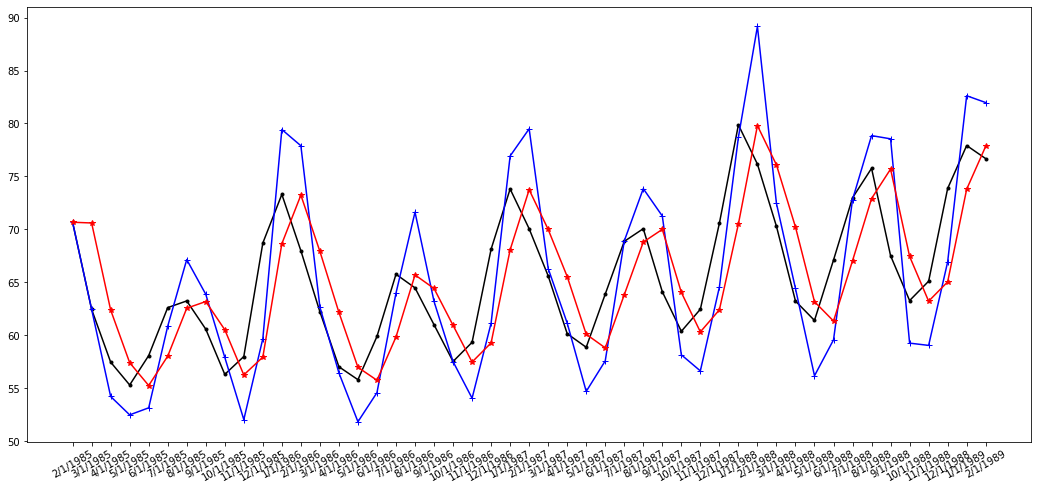

In [37]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=30)

# original data
plt.plot(electric_ts[1:50] , marker='.' , color='black')
plt.plot(fit1.fittedvalues , marker='+' , color='blue')
plt.plot(fit2.fittedvalues , marker='*' , color='red')

### Note:
1. here we can see the linear trend is not fit in this data coz we can see it is not incresing exponentialy
2. but the exponential trend is fiting in this data and showing the exponential trend as org data 